In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('HistoricalData_tesla.csv')
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,02/18/2025,$354.11,51631700,$355.01,$359.10,$350.02
1,02/14/2025,$355.84,68277280,$360.62,$362.00,$347.50
2,02/13/2025,$355.94,89441520,$345.00,$358.69,$342.85
3,02/12/2025,$336.51,105382700,$329.94,$346.40,$329.12
4,02/11/2025,$328.50,118543400,$345.80,$349.37,$325.10


In [15]:
df['Date'] = pd.to_datetime(df['Date'])

In [16]:
import pandas as pd

# Columns containing prices
price_columns = ['Close/Last', 'Open', 'High', 'Low']

# Remove the '$' sign and convert to float
for col in price_columns:
    df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2515 non-null   datetime64[ns]
 1   Close/Last  2515 non-null   float64       
 2   Volume      2515 non-null   int64         
 3   Open        2515 non-null   float64       
 4   High        2515 non-null   float64       
 5   Low         2515 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.0 KB


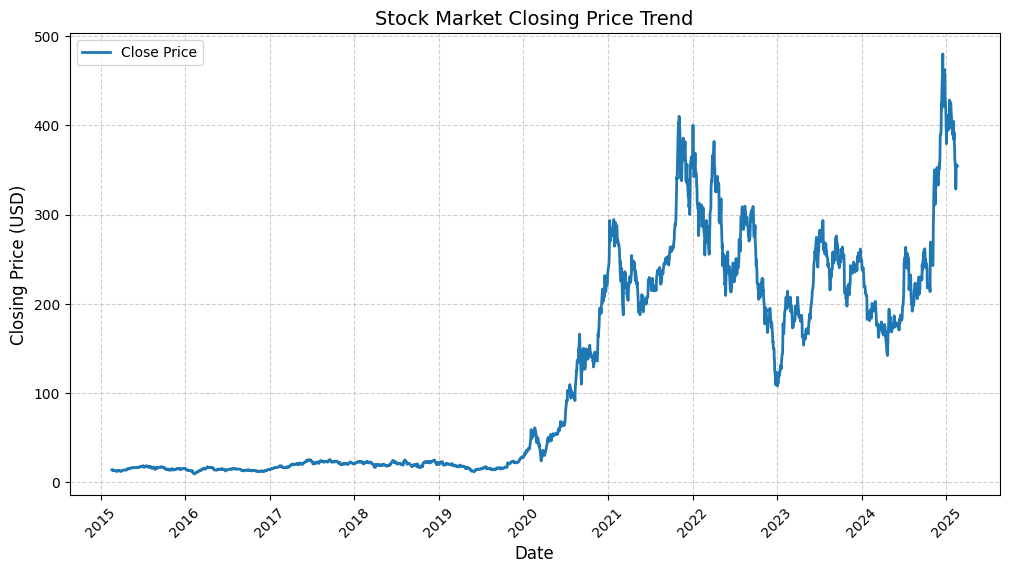

In [22]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the closing price with enhancements
sns.lineplot(x=df['Date'], y=df['Close/Last'], linewidth=2, label="Close Price")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add title and labels
plt.title('Stock Market Closing Price Trend', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)

# Add grid for better visualization
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.legend()
plt.show()

In [23]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Create lag features (previous day's closing price)
df['Prev_Close'] = df['Close/Last'].shift(1)

# Create moving average features
df['MA_5'] = df['Close/Last'].rolling(window=5).mean()
df['MA_10'] = df['Close/Last'].rolling(window=10).mean()

# Drop NaN values (due to rolling mean)
df = df.dropna()

# Features and target
features = ['Prev_Close', 'MA_5', 'MA_10', 'Open', 'High', 'Low', 'Volume']
target = 'Close/Last'


In [25]:
df.head()

,Date,Close/Last,Volume,Open,High,Low,Prev_Close,MA_5,MA_10
9,2025-02-04,392.21,57072240,382.63,394.0000,381.40,378.17,371.410,358.795
10,2025-02-03,383.68,93732120,386.68,389.1700,374.36,392.21,378.000,361.752
11,2025-01-31,404.60,83568220,401.53,419.9900,401.34,383.68,386.596,366.628
12,2025-01-30,400.28,98092880,410.78,412.5000,384.41,404.60,391.788,371.062
13,2025-01-29,389.10,68033650,395.21,398.5899,384.48,400.28,393.974,376.321


In [26]:
X = df[features]
y = df[target]

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Train XGBoost model
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, objective='reg:squarederror')
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Mean Absolute Error: 0.25


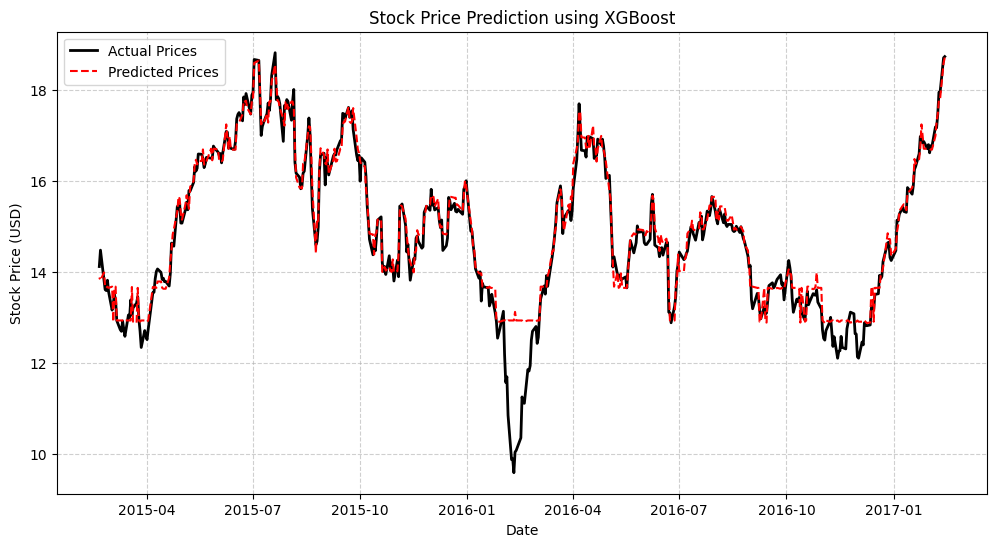

In [28]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

# Plot Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(df['Date'].iloc[-len(y_test):], y_test, label="Actual Prices", color='black', linewidth=2)
plt.plot(df['Date'].iloc[-len(y_test):], y_pred, label="Predicted Prices", color='red', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("Stock Price Prediction using XGBoost")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [40]:
import yfinance as yf

# Get Tesla stock data
tesla = yf.Ticker("TSLA")

# Get current price
current_price = tesla.history(period="50d")["Close"]


<Axes: >

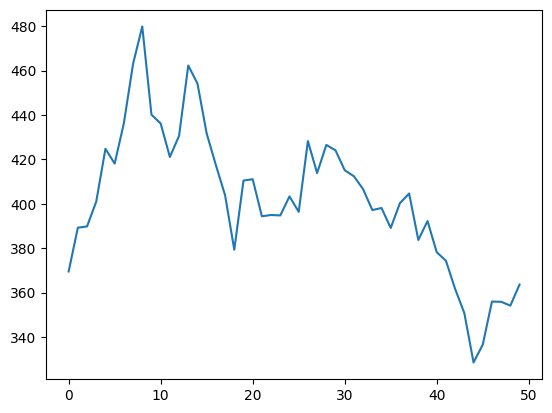

In [41]:
sns.lineplot(np.array(current_price))

In [ ]:
model.predict(